# Classification of Cryptocurrency Properties.

### Question ：Inspecting whether cryptocurrencies with the same technical properties('mineable') have similarities in pricing, percent change, volume etc. 

#### Background: 

By further exploring the data, we decided to create classfication models to classify cryptocurrecnies on the target dummy variables of 'mineable'. Within the cryptocurrecency world, there is a vast array of technical properties that affect the market behavior of cryptocurrencies, for example, decentralized finance cryptocurrecnies other known as defi, have infinite supply and expands infinitely. Property of mineable indicates whether a cryptocurrency can be aquired through mining. The value of those cryptos, from a finance point of view, has a more stable value and growth, which can be reflected through percent price change, and consistant growth in volume. 

Through the use of classfication models, in this case, KNN, decision tree classifer, and random forest, we want to identify if there is a viable relationship between the target 'mineable' and other variables. 

In this question, we want to find the best model to classify based on their characteristics.

The metric we will be using to analyze each model is MSE and accuracy




#### Structure of this Notebook: 
- Cleaning
- Test/Train splits
- Decision Tree
- Random Forest
- KNN
- Conclusion
- Reference

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn import metrics

#### 1. Data cleaning: Here, we are using the cleaned data from our prediction

In [51]:
crypto = pd.read_csv("crypto_cleaned_final.csv")

In [52]:
crypto.isnull().sum()

slug                        0
cmc_rank                    0
volume_24h                  0
percent_change_7d           0
market_cap                  0
'binance-smart-chain'       0
'collectibles-nfts'         0
'defi'                      0
'mineable'                  0
circulating/total_supply    0
price                       0
dtype: int64

In [53]:
crypto = crypto.set_index('slug')

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from mlxtend.frequent_patterns import apriori
from sklearn.cluster import KMeans


#from apyori import apriori

%matplotlib inline
plt.style.use('seaborn-white')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#### 2. Seperating our target variables of 'Mineable', and performing test train splits

In [55]:
crypto["'mineable'"] =crypto["'mineable'"].div(100)
y = crypto["'mineable'"]
x = crypto.drop(["'mineable'"],axis = 1)
#split into test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)


In [56]:
x

,cmc_rank,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi',circulating/total_supply,price
slug,,,,,,,,,
cardano,0.000000,3.974633e+00,12.827234,1.000000e+02,100.0,0.0,0.0,2.122528,2.258127
binance-coin,0.037106,2.656246e+00,15.418389,9.803027e+01,100.0,0.0,0.0,2.194894,421.643176
tether,0.074212,1.000000e+02,12.952336,9.407876e+01,100.0,0.0,0.0,2.091529,1.000178
xrp,0.111317,6.295998e+00,14.306661,6.740079e+01,0.0,0.0,0.0,1.026166,1.042624
solana,0.148423,5.389265e+00,15.065700,6.655776e+01,0.0,0.0,0.0,1.293040,161.682372
...,...,...,...,...,...,...,...,...,...
dinero,99.628942,1.356072e-08,14.589264,2.191418e-06,0.0,0.0,0.0,1.793904,0.000337
mox,99.777365,5.895963e-10,14.589264,1.368585e-06,0.0,0.0,0.0,2.194894,0.000481
argus,99.888683,0.000000e+00,8.671682,3.151228e-07,0.0,0.0,0.0,0.485145,0.001444


#### 3. We first run a decision tree classifier with no limit on depth.

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       261
         1.0       0.47      0.51      0.49        65

    accuracy                           0.79       326
   macro avg       0.67      0.68      0.68       326
weighted avg       0.79      0.79      0.79       326



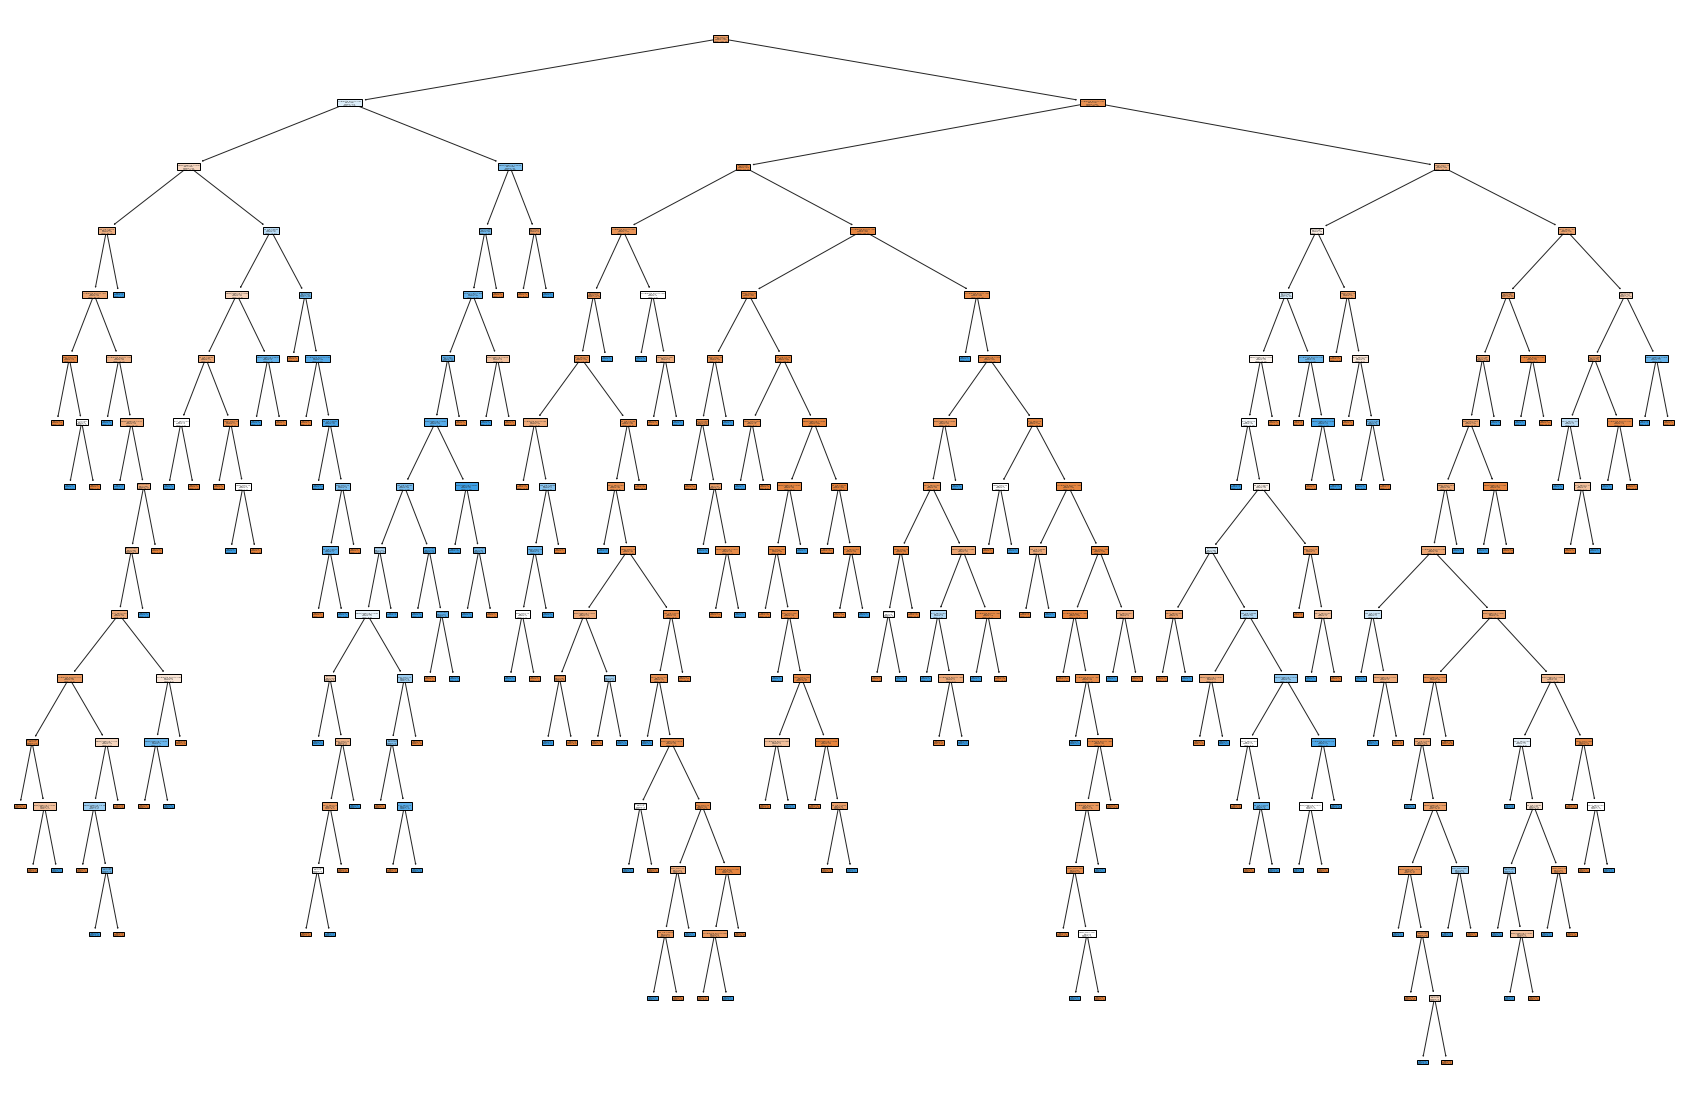

In [57]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
#plotting the decision tree along with its report. 
fig = plt.figure(figsize=(30,20))
plot_tree = tree.plot_tree(clf, feature_names=list(X_train.columns), filled =True)

print(classification_report(y_test, clf.predict(X_test)))

#### 4. Our second model is random forest, we tune the model based on n_etimators, and selecting the one with the least CV_error

In [58]:
regr = RandomForestClassifier(random_state=1)
regr.fit(X_train, y_train)
#report for Random Forest Classifier
print(classification_report(y_test, regr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       261
         1.0       0.72      0.45      0.55        65

    accuracy                           0.86       326
   macro avg       0.80      0.70      0.73       326
weighted avg       0.84      0.86      0.84       326



In [59]:
CV = [] #empty list to store cv
n_estimators = []


for i in range(20,200,20):
    rf2 = RandomForestClassifier(n_estimators=i, random_state=1)
    rf2.fit(X_train, y_train)
    CV_error = np.mean(cross_val_score(rf2, X_train, y_train, cv=10, scoring = "neg_mean_squared_error"))
    CV.append(CV_error)
    n_estimators.append(i)
    print("------------")
    print("n_estimator",i)
    print("(CV_error): ",CV_error)
    




------------
n_estimator 20
(CV_error):  -0.13977099236641224
------------
n_estimator 40
(CV_error):  -0.13900763358778628
------------
n_estimator 60
(CV_error):  -0.13516735173223723
------------
n_estimator 80
(CV_error):  -0.1313270698766882
------------
n_estimator 100
(CV_error):  -0.13056371109806225
------------
n_estimator 120
(CV_error):  -0.13286553141514976
------------
n_estimator 140
(CV_error):  -0.13209630064591898
------------
n_estimator 160
(CV_error):  -0.13440399295361127
------------
n_estimator 180
(CV_error):  -0.13594245449207282


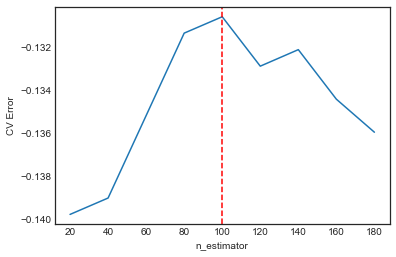

In [60]:

plt.plot(list(range(20,200,20)),CV)
plt.xlabel("n_estimator")
plt.ylabel("CV Error")
plt.axvline(x= 100,linestyle='--',color="red")
plt.show()

Here, we initialize the best random forest model with n_estimators equal to 100.

In [61]:
best_forest = RandomForestClassifier(n_estimators= 100, random_state=1)
best_forest.fit(X_train, y_train)
#report for Random Forest Classifier
print(classification_report(y_test, best_forest.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       261
         1.0       0.72      0.45      0.55        65

    accuracy                           0.86       326
   macro avg       0.80      0.70      0.73       326
weighted avg       0.84      0.86      0.84       326



#### 5. Our third model is a KNN.

In [62]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       261
         1.0       0.55      0.42      0.47        65

    accuracy                           0.82       326
   macro avg       0.71      0.67      0.68       326
weighted avg       0.80      0.82      0.81       326



In [63]:
knn_cverrs = []
for i in range(1,45):
    knn = KNeighborsClassifier(n_neighbors=i)
    CV_error = np.mean(cross_val_score(knn, X_train, y_train, cv=10))
    knn_cverrs.append(CV_error)
    print("------------")
    print("k =",i)
    print("(CV_error): ",CV_error)



------------
k = 1
(CV_error):  0.7856723429242513
------------
k = 2
(CV_error):  0.8233176746917203
------------
k = 3
(CV_error):  0.8194773928361714
------------
k = 4
(CV_error):  0.8379213153258954
------------
k = 5
(CV_error):  0.8364004697592484
------------
k = 6
(CV_error):  0.8348796241926012
------------
k = 7
(CV_error):  0.8341045214327656
------------
k = 8
(CV_error):  0.8340927774515562
------------
k = 9
(CV_error):  0.8364004697592483
------------
k = 10
(CV_error):  0.8394656488549618
------------
k = 11
(CV_error):  0.8371579565472697
------------
k = 12
(CV_error):  0.8448502642395772
------------
k = 13
(CV_error):  0.8402466236054023
------------
k = 14
(CV_error):  0.8433294186729302
------------
k = 15
(CV_error):  0.8387022900763359
------------
k = 16
(CV_error):  0.8417850851438639
------------
k = 17
(CV_error):  0.8387022900763359
------------
k = 18
(CV_error):  0.8417850851438636
------------
k = 19
(CV_error):  0.8402407516147974
------------
k = 20
(

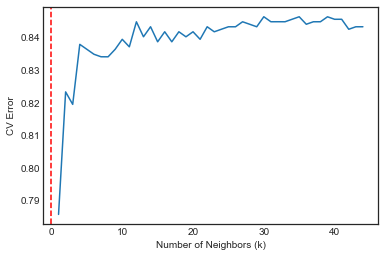

In [15]:
best_acc =(np.where(CV_error == np.max(CV_error))[0])   
x_graph = list(range(1,45))
plt.plot(x_graph,knn_cverrs)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("CV Error")
plt.axvline(x=best_acc,linestyle='--',color="red")
plt.show()

The best model is at k=1. Let's look at the accuracy for this model.

In [64]:
best_neigh = KNeighborsClassifier(n_neighbors=1)
best_neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       261
         1.0       0.55      0.42      0.47        65

    accuracy                           0.82       326
   macro avg       0.71      0.67      0.68       326
weighted avg       0.80      0.82      0.81       326



#### 6. Based on our model tuning, the best model for each model type are: 

In [17]:
best_forest = RandomForestClassifier(n_estimators= 100, random_state=1)
best_forest.fit(X_train, y_train)
#report for Random Forest Classifier
print(classification_report(y_test, best_forest.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       261
         1.0       0.72      0.45      0.55        65

    accuracy                           0.86       326
   macro avg       0.80      0.70      0.73       326
weighted avg       0.84      0.86      0.84       326



              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       261
         1.0       0.45      0.46      0.45        65

    accuracy                           0.78       326
   macro avg       0.66      0.66      0.66       326
weighted avg       0.78      0.78      0.78       326



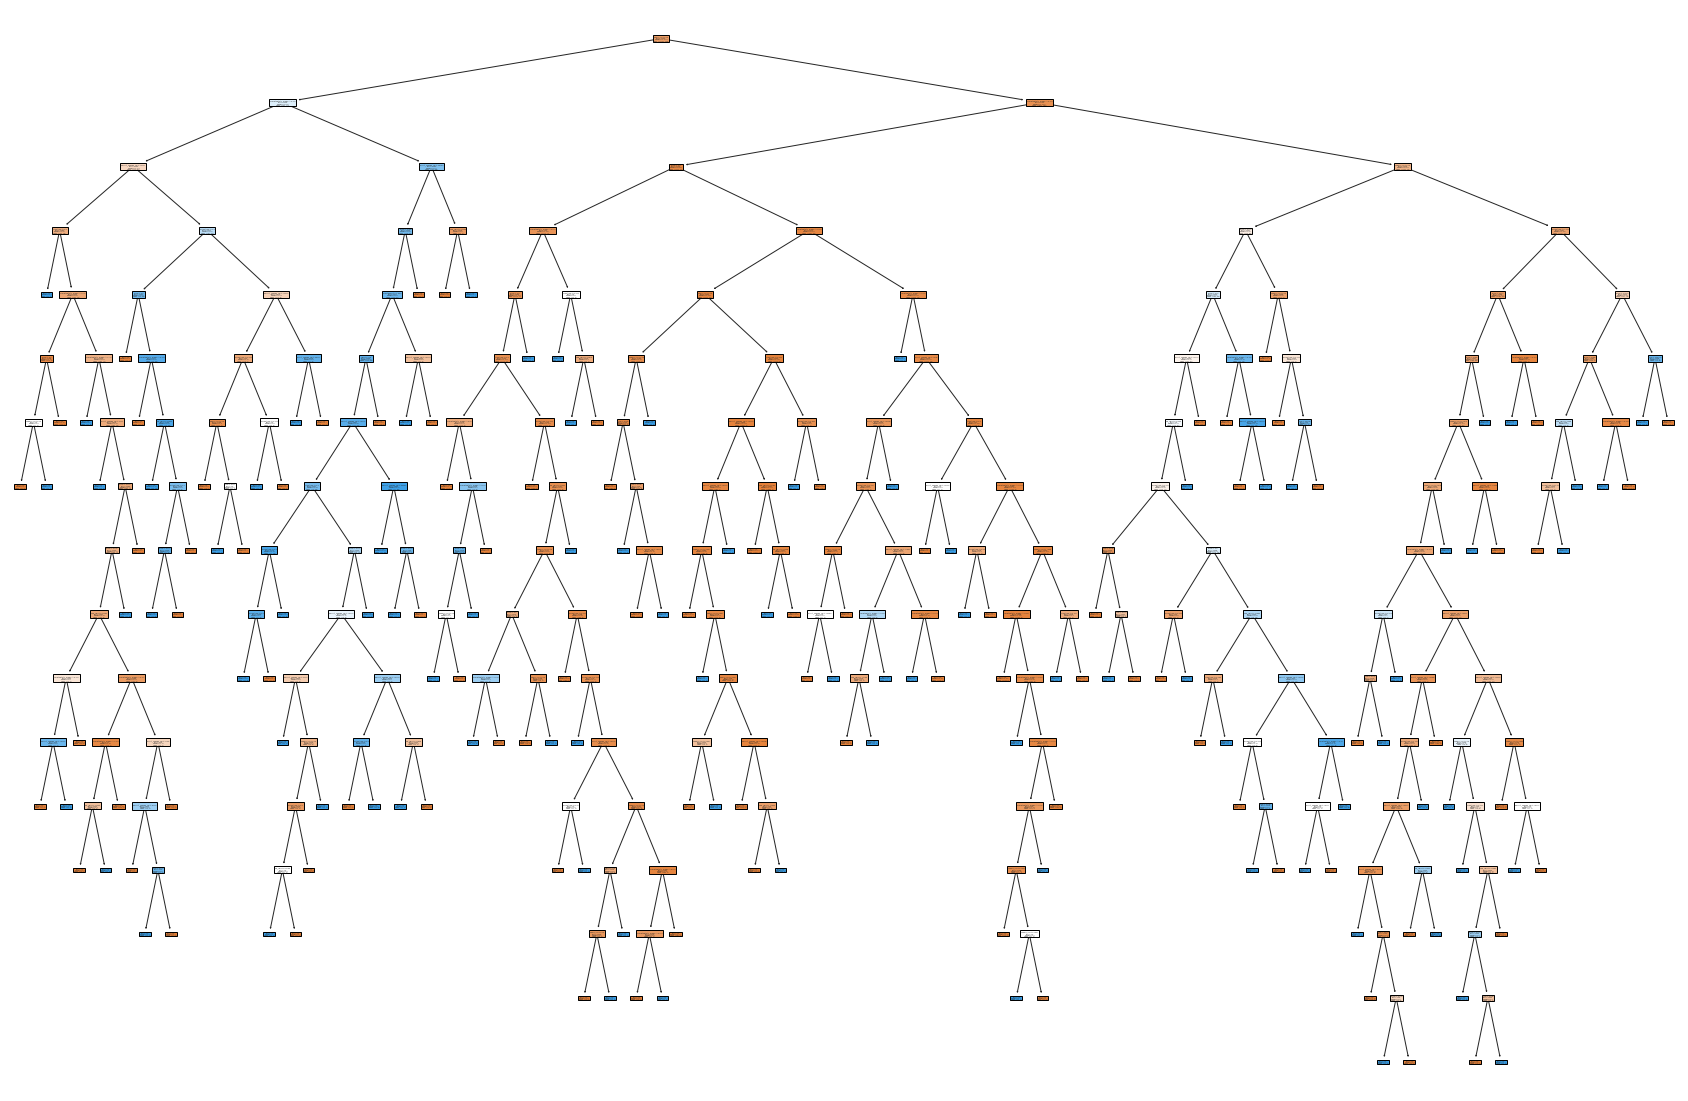

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
#plotting the decision tree along with its report. 
fig = plt.figure(figsize=(30,20))
plot_tree = tree.plot_tree(clf, feature_names=list(X_train.columns), filled =True)

print(classification_report(y_test, clf.predict(X_test)))

In [50]:
best_neigh = KNeighborsClassifier(n_neighbors=1)
best_neigh.fit(X_train, y_train)
y_test_pred = best_neigh.predict(X_test)
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       261
         1.0       0.40      0.45      0.42        65

    accuracy                           0.75       326
   macro avg       0.63      0.64      0.63       326
weighted avg       0.77      0.75      0.76       326



Random forest is our best model with 0.86 accuracy.


#### 6. Now lets look at the aoc and roc of the three models to confirm our decision of choosing Random Forest

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
knn_probs = neigh.predict_proba(X_test)
auc = roc_auc_score(y_test, knn_probs[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_probs[:,1])

1) First, this is the ROC curce for KNN.

Text(0.5, 1.0, '0.7666371942234012')

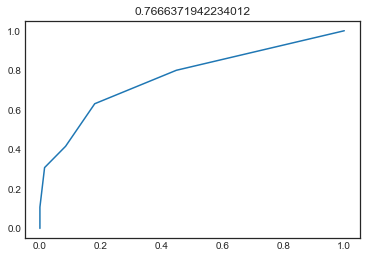

In [23]:

fig = plt.figure()
ax = plt.axes()
ax.plot( knn_fpr,knn_tpr)
plt.title(auc)



In [24]:
rf_probs = best_forest.predict_proba(X_test)
auc = roc_auc_score(y_test, rf_probs[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_probs[:,1])

1) Next, this is the ROC curce for Random Forest. 

Text(0.5, 1.0, '0.8449749484232243')

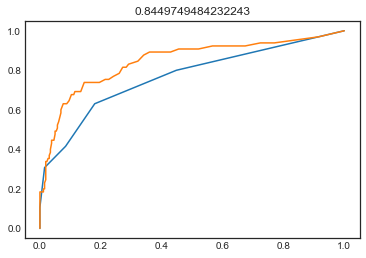

In [25]:
fig = plt.figure()
ax = plt.axes()
ax.plot( knn_fpr,knn_tpr)
ax.plot( rf_fpr,rf_tpr)
plt.title(auc)



We can see that the orange line is clsoer to the top left corner, meaning it is more accurate.

In [26]:

clf_probs = clf.predict_proba(X_test)
auc = roc_auc_score(y_test, clf_probs[:,1])
clf_fpr, clf_tpr, thresholds = roc_curve(y_test, clf_probs[:,1])

3) Now we add the third curve of roc for decision tree classifier. 

Text(0.5, 1.0, 'ROC')

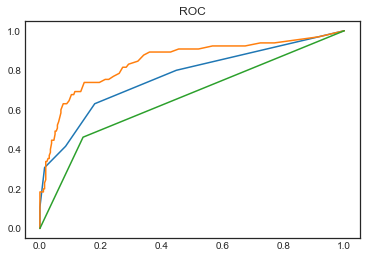

In [27]:
fig = plt.figure()
ax = plt.axes()
ax.plot( knn_fpr,knn_tpr)
ax.plot( rf_fpr,rf_tpr)
ax.plot( clf_fpr,clf_tpr)
plt.title('ROC')


Overall, by looking at this graph, Random Forest remains our best model. 

## Conclusion
By comparing the accuracy of our models and looking at the ROC graph, we see that random forest has the best performance of 0.86 accuracy. Therefore, this is the most appropriate model to answer our question. 

With this accuracy, we can conclude that for a cryptocurrency to be mineable, it does show behavior similarities within our variable space such as volume, pricing change etc. 

By using our classification model, we can test whether mineable cryptos show similar behaviors with others that has the  mineable tag. If a crypto is mineable and is classified as not, we can question the integrity of the blockchain foundation, and see why it is not showing similar market behavior

## Future Work
Data constraints: Since our data is only focused on cryptos with prices less than 500, because larger cryptocurrencies show very different behaviors, in the future we can potential make different models for different price ranges. 
If we have more data within each category of crypto, we could perhaps make individual models and assumptions based on different tags such as NFT, DAO, defi etc. 
We did not use time-series analysis in this project. If we had sufficient time-series data, we could perhaps classify the patterns of time-series. 


## Reference
Labs, Homeworks and In-class exercises from class.
